# This is an example of dog and cat detection on an image

### Installing libraries

In [23]:
import torch
import torchvision
import numpy as np
import PIL.Image as Image
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

#### We'll use the detect.py script to run our model on the images

Here I'm specifying:

    weights path

    resize images to 640x640 px

    conf 0.3 - take into account prediction with confidence of 0.3 or higher

    path to images

In [ ]:
!python3 detect.py --weights runs/train/yolov5x_pets/weights/best.pt --img 640 --conf 0.3 --source ../petsYOLO/inference/images/

In [57]:
# helper function

def load_image(img_path: Path, resize=True):
    img = cv2.cvtColor(cv2.imread(str(img_path)), cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (512, 512), interpolation = cv2.INTER_AREA)
    return img

def show_grid(image_paths):
    images = [load_image(img) for img in image_paths]
    images = torch.as_tensor(images)
    images = images.permute(0, 3, 1, 2)
    grid_img = torchvision.utils.make_grid(images, nrow=6)
    plt.figure(figsize=(24, 12))
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.axis('off')

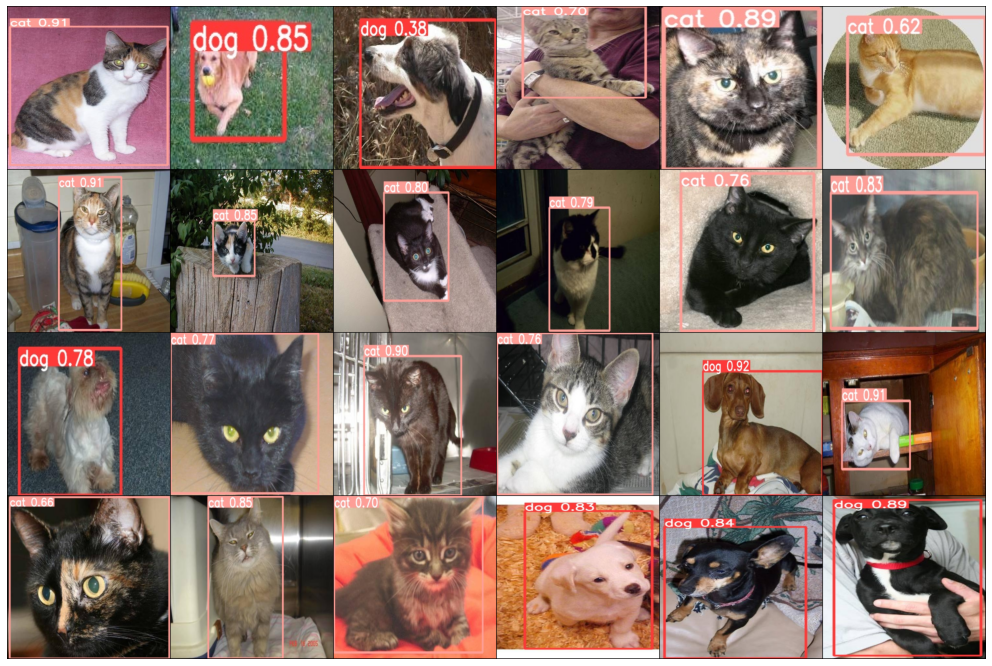

In [58]:
img_paths = np.array(list(Path("runs/detect/exp").glob("*.jpeg")))[:24]
show_grid(img_paths)

#### As we can see, our model does a pretty good job!

In [71]:
# Example of using model instead of detect.py script

In [45]:
model = torch.hub.load('yolov5', 'custom', path='yolov5/runs/train/yolov5x_pets/weights/best.pt', source='local')

print("Done")

YOLOv5 🚀 2022-8-26 Python-3.8.5 torch-1.11.0 CPU

Fusing layers... 
YOLOv5x summary: 444 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
Adding AutoShape... 


Done


In [80]:
img = 'petsYOLO/inference/images/15.jpg'

output = model(img)
output.show()

FileNotFoundError: [Errno 2] No such file or directory: 'petsYOLO/inference/images/15.jpg'